## NAMED ENTITY RECOGNITION

In [1]:
# importing necessary libraries

import numpy as np 
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\Mathivanan\Downloads\ner_dataset.csv", encoding="latin1")

In [3]:
data.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


In [4]:
data.isnull().any()

Sentence #     True
Word          False
POS           False
Tag           False
dtype: bool

In [5]:
# filling null values in Sentence # column with previous value

In [7]:
data.fillna(method="ffill", inplace=True)

In [8]:
data.head(40)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [9]:
# Exploratory Dataset Analysis

In [11]:
uniq_words = len(set(data['Word'].to_list()))
print(f"Total no. of unique words: {uniq_words}")

Total no. of unique words: 35178


In [15]:
# entity types recognized

entities = data['Tag'].to_list()

entie = []
count_entie = {}

for entity in entities:
    if entity != 'O':
        entity_type = entity.split('-')[1]
        
        if entity_type not in entie:
            entie.append(entity_type)
            count_entie[entity_type] = 1
        else:
            count_entie[entity_type] += 1


print(f"List of entity types that can be recognized by this model are: ")
for entity in entie:
    print(entity)

List of entity types that can be recognized by this model are: 
geo
gpe
per
org
tim
art
nat
eve


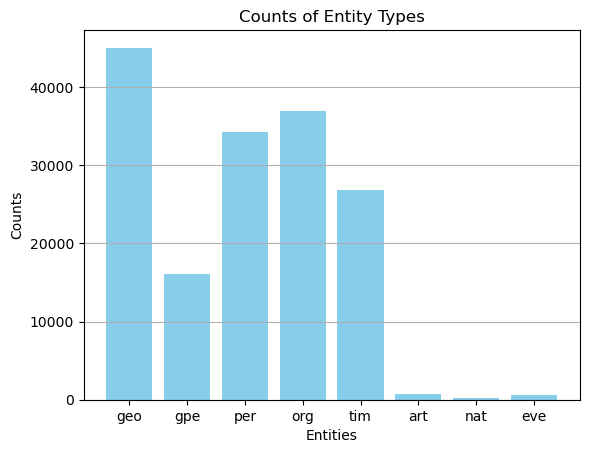

In [16]:
import matplotlib.pyplot as plt

labels = list(count_entie.keys()) 
counts = list(count_entie.values()) 

plt.bar(labels, counts, color='skyblue')
plt.xlabel('Entities')
plt.ylabel('Counts')
plt.title('Counts of Entity Types')
plt.grid(axis='y') 
plt.show()

In [19]:
# creating sentences with its pos tag

class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 0
        self.data = data
        self.empty = False
        agg_function = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                         s["POS"].values.tolist(),
                                                         s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_function)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        if self.n_sent < len(self.sentences):
            s = self.sentences[self.n_sent]
            self.n_sent += 1
            return s
        else:
            return None


In [20]:
getter = SentenceGetter(data)
sent = getter.get_next()
print(sent)

[('Thousands', 'NNS', 'O'), ('of', 'IN', 'O'), ('demonstrators', 'NNS', 'O'), ('have', 'VBP', 'O'), ('marched', 'VBN', 'O'), ('through', 'IN', 'O'), ('London', 'NNP', 'B-geo'), ('to', 'TO', 'O'), ('protest', 'VB', 'O'), ('the', 'DT', 'O'), ('war', 'NN', 'O'), ('in', 'IN', 'O'), ('Iraq', 'NNP', 'B-geo'), ('and', 'CC', 'O'), ('demand', 'VB', 'O'), ('the', 'DT', 'O'), ('withdrawal', 'NN', 'O'), ('of', 'IN', 'O'), ('British', 'JJ', 'B-gpe'), ('troops', 'NNS', 'O'), ('from', 'IN', 'O'), ('that', 'DT', 'O'), ('country', 'NN', 'O'), ('.', '.', 'O')]


In [21]:
print(getter.get_next())

[('Iranian', 'JJ', 'B-gpe'), ('officials', 'NNS', 'O'), ('say', 'VBP', 'O'), ('they', 'PRP', 'O'), ('expect', 'VBP', 'O'), ('to', 'TO', 'O'), ('get', 'VB', 'O'), ('access', 'NN', 'O'), ('to', 'TO', 'O'), ('sealed', 'JJ', 'O'), ('sensitive', 'JJ', 'O'), ('parts', 'NNS', 'O'), ('of', 'IN', 'O'), ('the', 'DT', 'O'), ('plant', 'NN', 'O'), ('Wednesday', 'NNP', 'B-tim'), (',', ',', 'O'), ('after', 'IN', 'O'), ('an', 'DT', 'O'), ('IAEA', 'NNP', 'B-org'), ('surveillance', 'NN', 'O'), ('system', 'NN', 'O'), ('begins', 'VBZ', 'O'), ('functioning', 'VBG', 'O'), ('.', '.', 'O')]


In [22]:
sentences = getter.sentences            # sentences holds the list of sentences

In [25]:
# function to extract feature from the sentence

def word_to_features(sentence, i):
    word = sentence[i][0]
    features = {
        
        # original word
        'word': word,
        'is_first': i == 0, 
        'is_last': i == len(sentence) - 1,  
        'is_capitalized': word[0].upper() == word[0],
        'is_all_caps': word.upper() == word,     
        'is_all_lower': word.lower() == word,      
        
        # prefix
        'prefix-1': word[0],   
        'prefix-2': word[:2],
        'prefix-3': word[:3],
        
        #suffix
        'suffix-1': word[-1],
        'suffix-2': word[-2:],
        'suffix-3': word[-3:],
        
        # previous word
        'prev_word': '' if i == 0 else sentence[i-1][0],

        # next word
        'next_word': '' if i == len(sentence)-1 else sentence[i+1][0],
        
        # special chars
        'has_hyphen': '-' in word,    
        'is_numeric': word.isdigit(),  
        'capitals_inside': word[1:].lower() != word[1:]
        
    }
    
    return features

In [26]:
# functions to create features and labels

def sentence_to_features(sentence):
    return [word_to_features(sentence, i) for i in range(len(sentence))]

def sentence_to_labels(sentence):
    return [label for token, postag, label in sentence]

In [28]:
x = [sentence_to_features(s) for s in sentences]          # x holds features
y = [sentence_to_labels(s) for s in sentences]            # y holds labels

In [29]:
print(f"Total no. of unique sentences are: {len(x)}")

Total no. of unique sentences are: 47959


In [30]:
x[:20]          # x sample data

[[{'word': 'Thousands',
   'is_first': True,
   'is_last': False,
   'is_capitalized': True,
   'is_all_caps': False,
   'is_all_lower': False,
   'prefix-1': 'T',
   'prefix-2': 'Th',
   'prefix-3': 'Tho',
   'suffix-1': 's',
   'suffix-2': 'ds',
   'suffix-3': 'nds',
   'prev_word': '',
   'next_word': 'of',
   'has_hyphen': False,
   'is_numeric': False,
   'capitals_inside': False},
  {'word': 'of',
   'is_first': False,
   'is_last': False,
   'is_capitalized': False,
   'is_all_caps': False,
   'is_all_lower': True,
   'prefix-1': 'o',
   'prefix-2': 'of',
   'prefix-3': 'of',
   'suffix-1': 'f',
   'suffix-2': 'of',
   'suffix-3': 'of',
   'prev_word': 'Thousands',
   'next_word': 'demonstrators',
   'has_hyphen': False,
   'is_numeric': False,
   'capitals_inside': False},
  {'word': 'demonstrators',
   'is_first': False,
   'is_last': False,
   'is_capitalized': False,
   'is_all_caps': False,
   'is_all_lower': True,
   'prefix-1': 'd',
   'prefix-2': 'de',
   'prefix-3': 'de

In [31]:
y[:20]          # y sample data

[['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-gpe',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B-gpe',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-tim',
  'O',
  'O',
  'O',
  'B-org',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O',
  'O',
  'B-tim',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-org',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'I-geo',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-geo',
  'O',
  'O',
  'B-per',
  'I-per',
  'O',
  'B-tim',
  'O',
  'B-geo',
  'O',
  'B-gpe',
  'O',
  'B-gpe',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-geo',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B-per',
  'I-per',
  'O',
  'O',
  'O',
  'O',


In [33]:
from sklearn_crfsuite import CRF
from sklearn_crfsuite import metrics

In [35]:
split_ratio = int(0.85 * len(x))                    # train-test-split ratio
print(split_ratio)

40765


In [38]:
# train data
X_train = x[:split_ratio]           
y_train = y[:split_ratio] 

# test data
X_test = x[split_ratio:]
y_test = y[split_ratio:] 

In [39]:
print(f" X_train: {len(X_train)}, X_test: {len(X_test)}")
print(f" y_train: {len(y_train)}, y_test: {len(y_test)}")

 X_train: 40765, X_test: 7194
 y_train: 40765, y_test: 7194


In [ ]:
# conditional random field algorithm

In [40]:
crf = CRF(algorithm="lbfgs",
          c1=0.1,
          c2=0.1,
          max_iterations=100,
          all_possible_transitions=False) 

In [42]:
# training the model

try:
    crf.fit(X_train, y_train)
except:
    pass

In [50]:
# saving the model as pickle file

import pickle 

with open("crf_model.pkl","wb") as fp:
    pickle.dump(crf, fp)

In [51]:
# predict 

y_pred = crf.predict(X_test)

In [55]:
# accuracy score based on prediction of test data

print(f"Accuracy: {round(metrics.flat_accuracy_score(y_test, y_pred),2)}")

Accuracy: 0.97


## Prediction System for Named Entity Recognition

In [57]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mathivanan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Mathivanan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [84]:
def get_named_entity():
    sentence = input("Enter the sentence: ")
    tokens = sentence.split(" ")
    res = nltk.pos_tag(nltk.word_tokenize(sentence)) 
    x_sample = [sentence_to_features(res)] 
    y_sample = crf.predict(x_sample)[0] 
    
    print("Named Entities present in the sentence are: ")
    
    for entity_ind in range(len(y_sample)):
        if(y_sample[entity_ind].upper() != 'O'):
            tag = y_sample[entity_ind].split('-')[1]
            print(f"{tokens[entity_ind]} - {tag}") 
    

In [91]:
get_named_entity()

Enter the sentence: ViratKohli is a great cricketer from India
Named Entities present in the sentence are: 
ViratKohli - per
India - geo
